In [1]:
import graphlab

In [2]:
sales_data = graphlab.SFrame('data/kc_house_data.gl/')

This non-commercial license of GraphLab Create for academic use is assigned to amalbabu53@gmail.com and will expire on September 13, 2020.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1572698250.log


In [3]:
sales_data.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560,2,0


In [10]:
def polynomial_sframe(feature, degree=1):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_sframe[name] to be feature^power
            poly_sframe[name] = feature.apply(lambda x: x**power)
    return poly_sframe

In [9]:
sales_data_sorted = sales_data.sort(['sqft_living', 'price'])

In [11]:
poly1_data = polynomial_sframe(sales_data_sorted['sqft_living'])

In [12]:
poly1_data.head()

power_1
290.0
370.0
380.0
384.0
390.0
390.0
410.0
420.0
420.0
430.0


In [13]:
poly1_data['price'] = sales_data_sorted['price']

In [15]:
linear_model = graphlab.linear_regression.create(poly1_data, target='price', features=['power_1'], validation_set = None)


Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.018426     | 4362074.696077     | 261440.790724 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

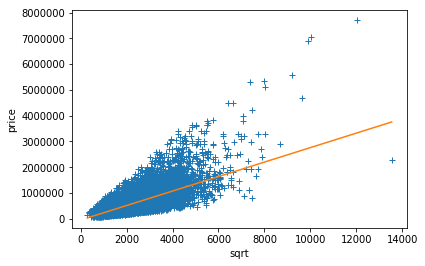

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('sqrt')
plt.ylabel('price')
plt.plot(poly1_data['power_1'], poly1_data['price'], '+', 
        poly1_data['power_1'], linear_model.predict(poly1_data), '-')

In [26]:
poly2_data = polynomial_sframe(sales_data_sorted['sqft_living'], 2)
poly2_data['price'] = sales_data_sorted['price']
model2 = linear_model = graphlab.linear_regression.create(poly2_data, target='price', features=['power_2'], validation_set = None)



Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.017993     | 7060272.332440     | 251906.559279 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

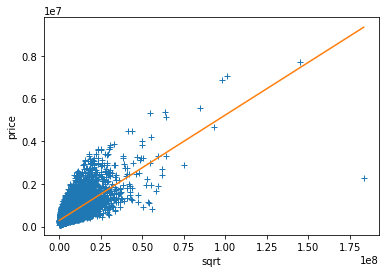

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('sqrt')
plt.ylabel('price')
plt.plot(poly2_data['power_2'], poly1_data['price'], '+', 
        poly2_data['power_2'], linear_model.predict(poly2_data), '-')

In [30]:
poly15_data = polynomial_sframe(sales_data_sorted['sqft_living'], 15)

In [31]:
poly15_data = polynomial_sframe(sales_data_sorted['sqft_living'], 15)
poly15_data['price'] = sales_data_sorted['price']
model3 = linear_model = graphlab.linear_regression.create(poly15_data, target='price', features=['power_15'], validation_set = None)




Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.019533     | 6624758.672523     | 366503.484839 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

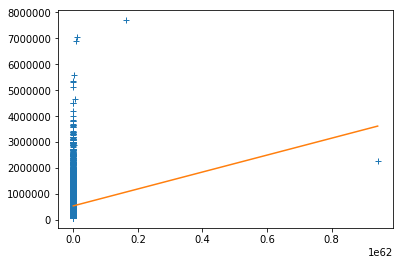

In [32]:

plt.plot(poly15_data['power_15'], poly1_data['price'], '+', 
        poly15_data['power_15'], linear_model.predict(poly15_data), '-')

In [36]:
sales_1, sales_2 = sales_data_sorted.random_split(0.5, seed=0)

In [37]:
set_1, set_2 = sales_1.random_split(0.5, seed=0)

In [38]:
set_3, set_4 = sales_2.random_split(0.5, seed=0)

In [40]:
poly_1_15 = polynomial_sframe(set_1['sqft_living'], 15)
poly_1_15['price'] = set_1['price']
poly_2_15 = polynomial_sframe(set_2['sqft_living'], 15)
poly_2_15['price'] = set_2['price']
poly_3_15 = polynomial_sframe(set_3['sqft_living'], 15)
poly_3_15['price'] = set_3['price']
poly_4_15 = polynomial_sframe(set_4['sqft_living'], 15)
poly_4_15['price'] = set_4['price']

In [41]:
model1_15 = graphlab.linear_regression.create(poly_1_15, target='price', features=['power_15'], validation_set=None)
model2_15 = graphlab.linear_regression.create(poly_2_15, target='price', features=['power_15'], validation_set=None)
model3_15 = graphlab.linear_regression.create(poly_3_15, target='price', features=['power_15'], validation_set=None)
model4_15 = graphlab.linear_regression.create(poly_4_15, target='price', features=['power_15'], validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 5404

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.006091     | 6649309.933131     | 389290.208472 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5398

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.005739     | 3449803.032238     | 338169.369522 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5409

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.005118     | 3940850.752324     | 358615.418977 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

Linear regression:

--------------------------------------------------------

Number of examples          : 5402

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.005432     | 3486650.074261     | 338719.974379 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [42]:
print(model1_15.coefficients)
print(model2_15.coefficients)
print(model3_15.coefficients)
print(model4_15.coefficients)

+-------------+-------+-------------------+------------------+
|     name    | index |       value       |      stderr      |
+-------------+-------+-------------------+------------------+
| (intercept) |  None |   546048.078681   |  5297.24780926   |
|   power_15  |  None | 3.07735556823e-56 | 4.0705345523e-57 |
+-------------+-------+-------------------+------------------+
[2 rows x 4 columns]

+-------------+-------+-------------------+-------------------+
|     name    | index |       value       |       stderr      |
+-------------+-------+-------------------+-------------------+
| (intercept) |  None |   536958.184414   |   4604.24979271   |
|   power_15  |  None | 1.86752845737e-53 | 1.17565594161e-54 |
+-------------+-------+-------------------+-------------------+
[2 rows x 4 columns]

+-------------+-------+-------------------+-------------------+
|     name    | index |       value       |       stderr      |
+-------------+-------+-------------------+-------------------+
| 

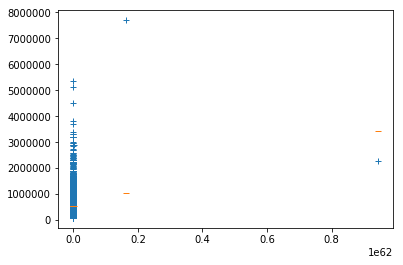

In [45]:
plt.plot(poly_1_15['power_15'], poly_1_15['price'], '+',
    poly_1_15['power_15'], model1_15.predict(poly_1_15), '_')

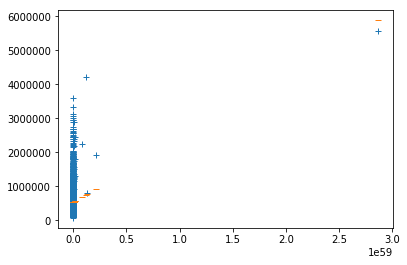

In [46]:
plt.plot(poly_2_15['power_15'], poly_2_15['price'], '+',
    poly_2_15['power_15'], model2_15.predict(poly_2_15), '_')

In [47]:
training_and_validation, testing = sales_data_sorted.random_split(0.9, seed=1)

In [48]:
training, validation = training_and_validation.random_split(0.5, seed=1)

In [52]:
polynomials = []

for degree in range(1, 16):
    poly = polynomial_sframe(training['sqft_living'], degree)
    poly['price'] = training['price']
    polynomials.append(poly)



In [56]:
models = []

for degree, ele in enumerate(polynomials):
    feature = 'power_' + str(degree + 1)
    model = graphlab.linear_regression.create(ele, target='price', features=[feature], validation_set=None, verbose = False)
    models.append(model)


In [113]:
rss_list = []

for degree in range(1, 16):
    poly = polynomial_sframe(training['sqft_living'], degree)
    feature_list = poly.column_names()
    
    poly['price'] = training['price']
    model = graphlab.linear_regression.create(poly, target='price', features=feature_list, validation_set=None, verbose = False)
    
    validation_poly = polynomial_sframe(validation['sqft_living'], degree)
    rss = sum([(x-y)**2 for x,y in zip(validation['price'], model.predict(validation_poly))])
    
    rss_list.append((degree, rss))

In [111]:
rss_list

[(1, 676709775198047.8),
 (2, 607090530698013.5),
 (3, 616714574532759.8),
 (4, 609129230654382.8),
 (5, 599177138583690.1),
 (6, 589182477809819.4),
 (7, 591717038418121.8),
 (8, 601558237778861.0),
 (9, 612563853988421.8),
 (10, 621744288938063.0),
 (11, 627012012707766.9),
 (12, 627757914768532.8),
 (13, 624738503271447.0),
 (14, 619369705907230.6),
 (15, 613089202416115.2)]

In [114]:
min(rss_list, key=lambda x: x[1])

(6, 589182477809819.0)

In [117]:
poly_6 = polynomial_sframe(training['sqft_living'], 6)
poly_6['price'] = training['price']

model_6 = graphlab.linear_regression.create(poly_6, target='price', features=['power_6'], validation_set=None, verbose = False)

In [118]:
model_6.coefficients

name,index,value,stderr
(intercept),None,537541.235651,3703.69209337
power_6,None,8.14095748354e-19,5.79081635385e-20


In [119]:
poly_test_6 = polynomial_sframe(testing['sqft_living'], 6)

poly_test_6.head()

power_1,power_2,power_3,power_4,power_5,power_6
430.0,184900.0,79507000.0,34188010000.0,1.47008443e+13,6.321363049e+15
480.0,230400.0,110592000.0,53084160000.0,2.54803968e+13,1.2230590464e+16
520.0,270400.0,140608000.0,73116160000.0,3.80204032e+13,1.9770609664e+16
550.0,302500.0,166375000.0,91506250000.0,5.03284375e+13,2.7680640625e+16
570.0,324900.0,185193000.0,1.0556001e+11,6.01692057e+13,3.4296447249e+16
600.0,360000.0,216000000.0,1.296e+11,7.776e+13,4.6656e+16
620.0,384400.0,238328000.0,1.4776336e+11,9.16132832e+13,5.6800235584e+16
670.0,448900.0,300763000.0,2.0151121e+11,1.350125107e+14,9.0458382169e+16
670.0,448900.0,300763000.0,2.0151121e+11,1.350125107e+14,9.0458382169e+16
680.0,462400.0,314432000.0,2.1381376e+11,1.453933568e+14,9.8867482624e+16


In [121]:
predicts = model_6.predict(poly_test_6)

In [122]:
errors = testing['price'] - predicts

In [123]:
(errors ** 2).sum()

250846533706239.3